In [8]:
#Febrey-Perot interferometer filter, prefilter, Solar bass spectrum etc.

In [22]:
#import basic libraries 
import numpy as np
import matplotlib.pyplot as pl
from scipy.io import readsav as readsav
from scipy.signal import fftconvolve
%matplotlib notebook


In [10]:
#profile of a single etalon
###########################
def fp_profile(lamb, d, R, n0, V, theta):
    print(d, R, n0, V, theta)
    lam = lamb
    lam0 = 6173.34
    F = (4.*R)/(1.0-R)**2.      
    finess = np.pi*np.sqrt(F)*0.5

    r13 = 5.2                   #pm/v
    E = V/(d)                     #electric field
    n = n0+0.5*n0**3.*E*r13*1e-6   #change in n0

    tmp = 2*n*d*np.cos(theta)          #phase

    fsr = lam0**2/(tmp)                #free spectral range (FSR)    
    fsr = fsr*1.e-7                   #FSR (A)

    fwhm = fsr/finess                 #fullwidth half maxima

    delt = (2.*np.pi)*tmp

    delt = (delt*1.e7)/(lam)

    denom = (1.+ F*(np.sin(delt/2.))**2.)
    trans = 1./denom
    print('FSR, FWHM, Finesse :', fsr,fwhm,finess)

    shift=0.5*(n0**2)*E*r13*1e-6*lam0
    return trans, shift
#########################

#profile of a prefilter
#######################
def prefilter(lamb,p1, w0, pfwhm, cc, asymp):

	denom = 1+(2*((lamb-w0)/pfwhm))**2*cc
	pref = (p1/denom)*(1+lamb*asymp)

	return pref
########################

In [11]:
#read bass solar spectrum around 617.3 nm
#########################################
a = np.loadtxt('bass_6173.dat')
ll = a[:,0]
yin = a[:,1]
TT = yin/np.max(yin)
#pl.plot(ll,TT)      #plot

0.226 0.9 2.28496 0 0.0
FSR, FWHM, Finesse : 3.689974429520813 0.12380900381565768 29.803764797388308


<IPython.core.display.Javascript object>


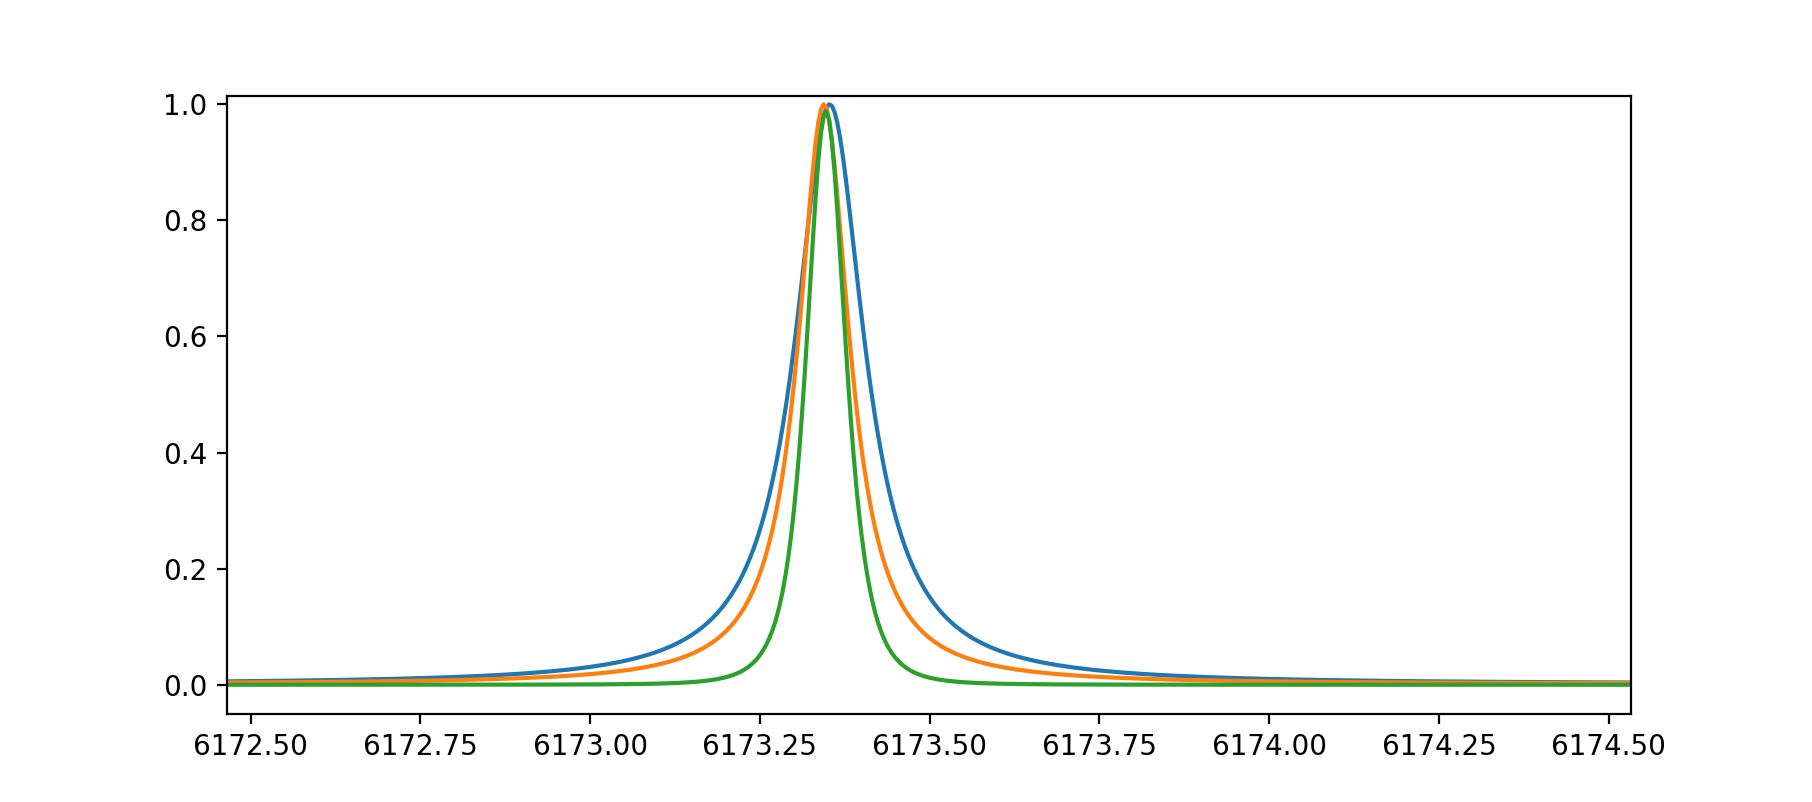

0.3 0.9 2.28496 410 0.0
FSR, FWHM, Finesse : 2.7291492776144066 0.09157062190524201 29.803764797388308


<IPython.core.display.Javascript object>


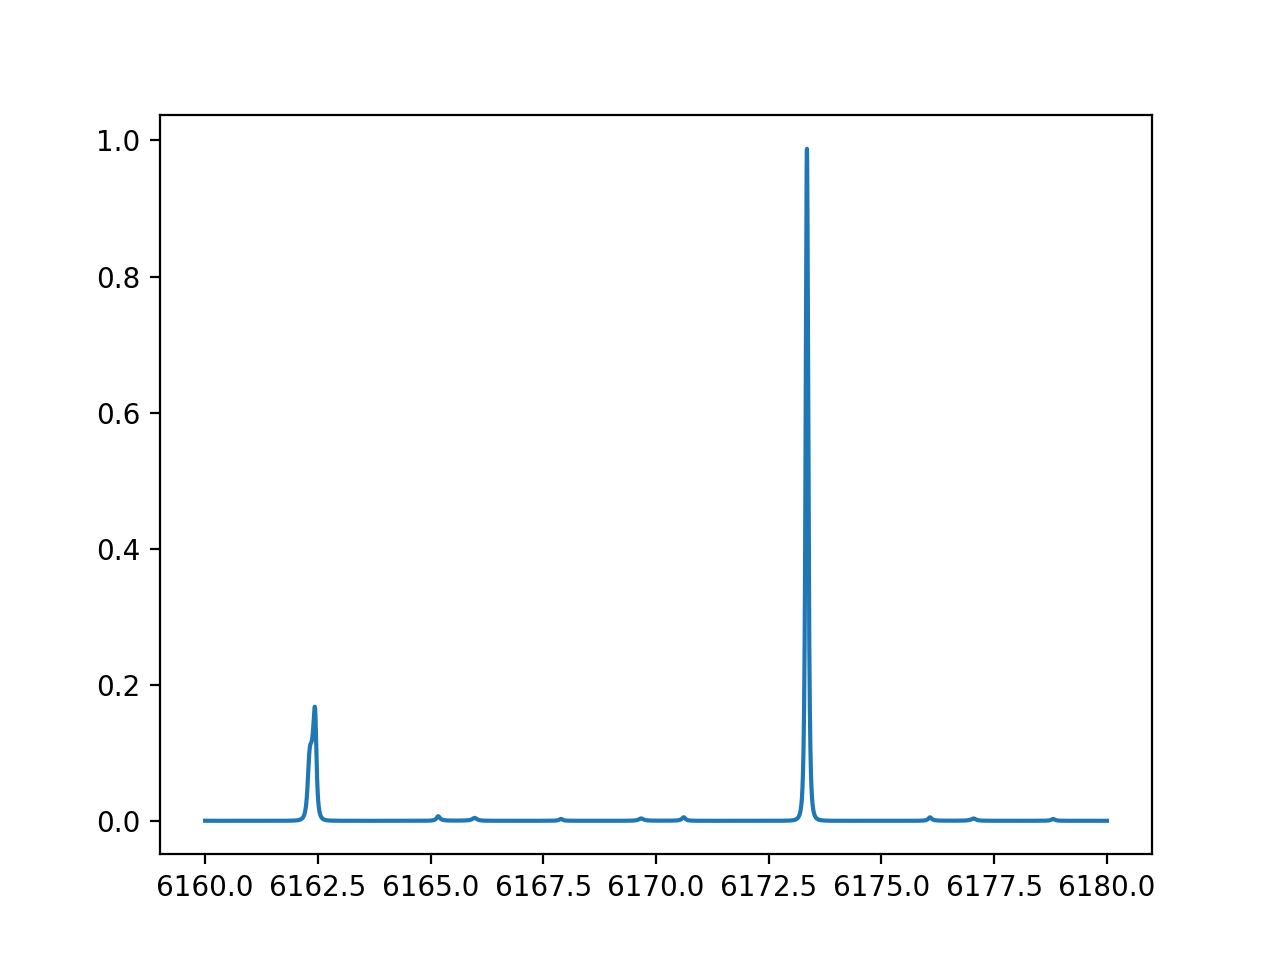

<IPython.core.display.Javascript object>


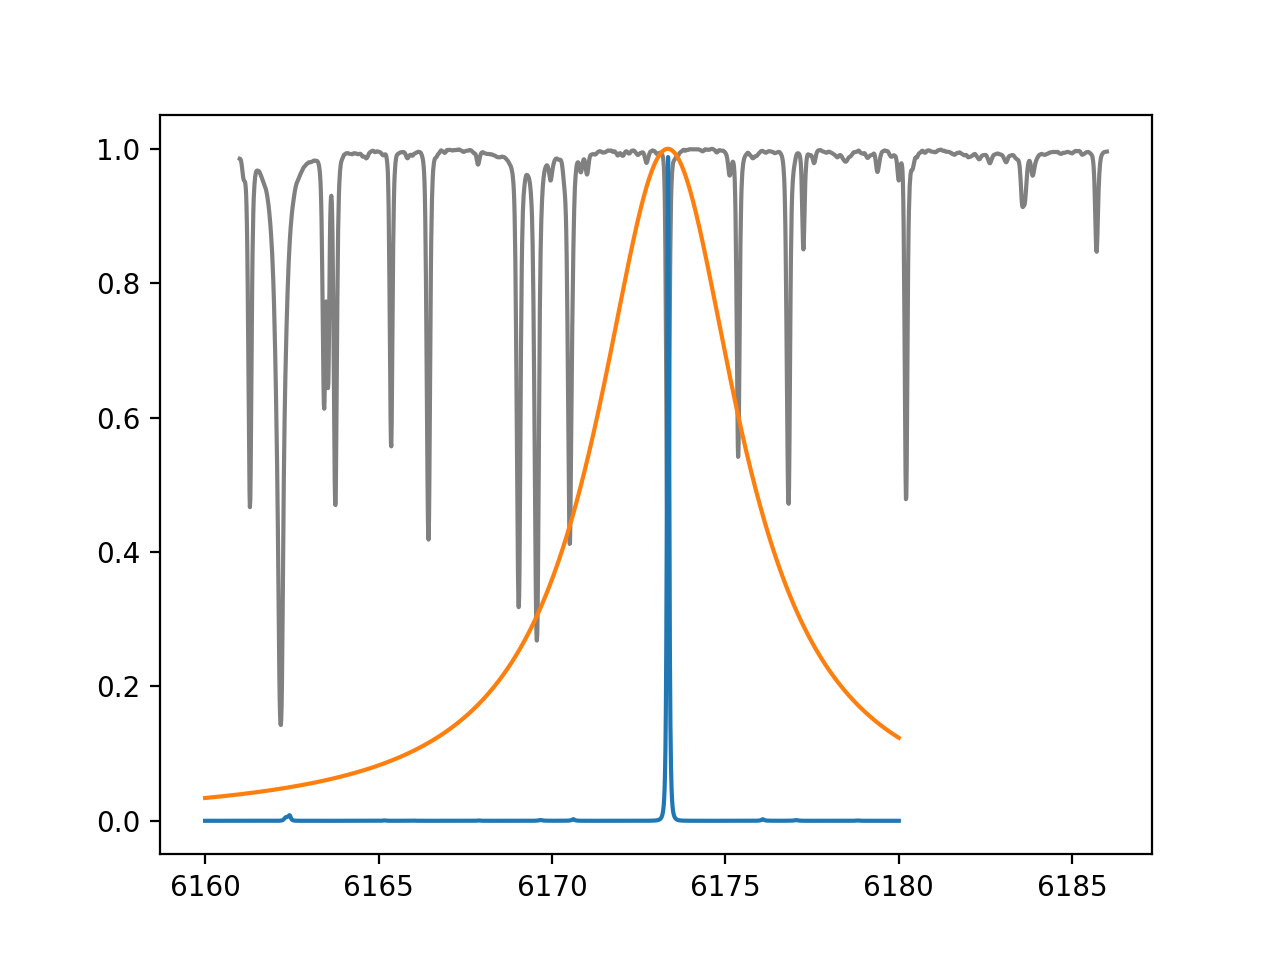

<IPython.core.display.Javascript object>


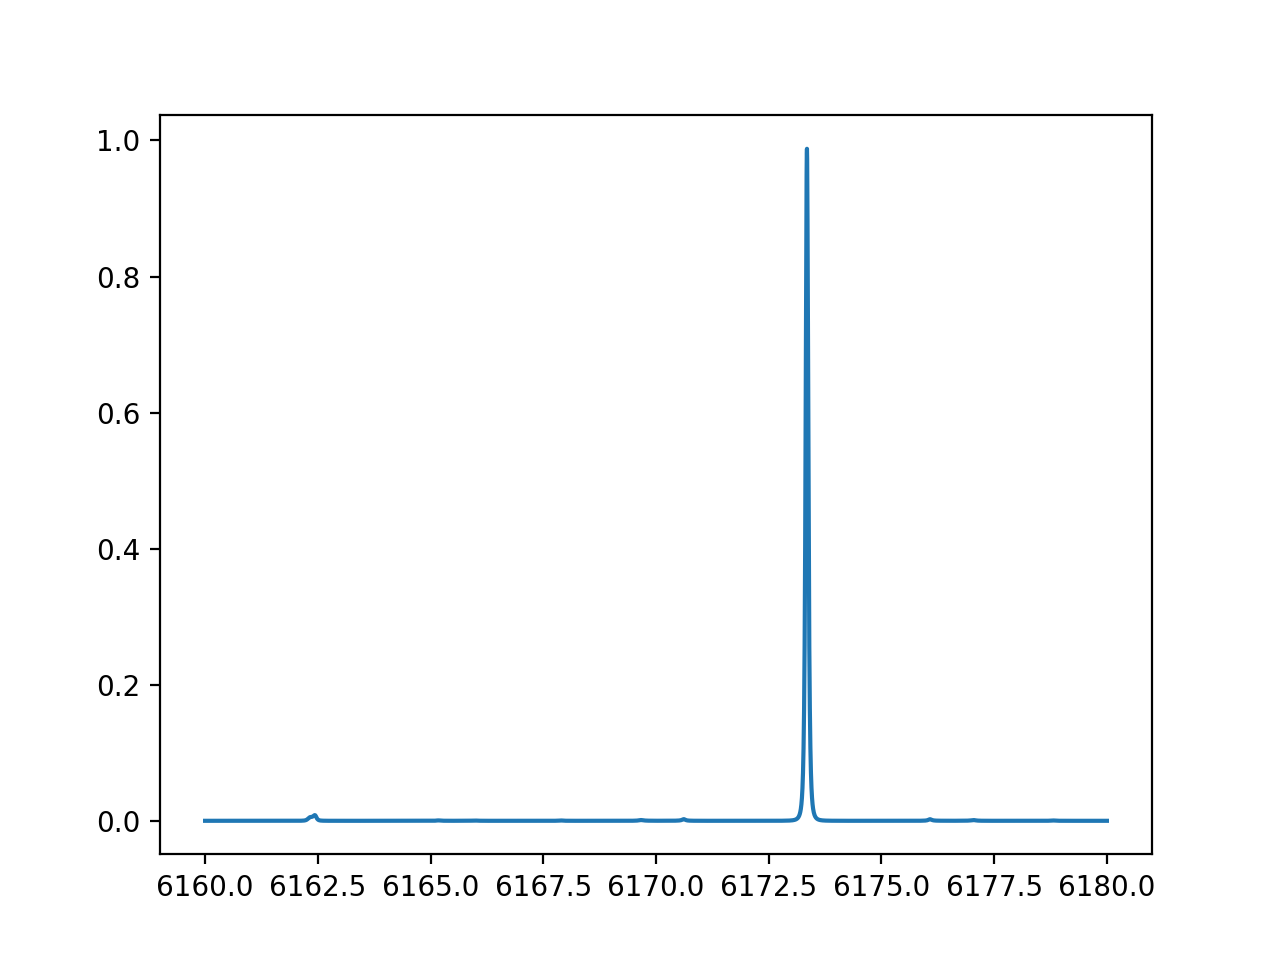

In [21]:
#prefilter profile
#check prefilter
p1=1
w0 = 6173.34
pfwhm = 5
cc = 1
asymp = 0
ff = prefilter(lamb,p1, w0, pfwhm, cc, asymp)
##############

#FP1
#####
d= 0.226    # spacing (mm)
R = .9       # reflectivity

theta = 0.0   # angle of incidence
vt = 0
n0 = 2.28496

lamb = np.linspace(6160,6180,5001)
fp1, shift = fp_profile( lamb, d, R, n0, vt, theta)

#FP2
#####
d= 0.3    # spacing (mm)
R = .9       # reflectivity

theta = 0.0   # angle of incidence
#vt=420
vt = 410
n0 = 2.28496

lamb = np.linspace(6160,6180,5001)
pl.figure('fp profiles')
fp2, shift = fp_profile( lamb, d, R, n0, vt, theta)
pl.plot(lamb,fp1)
pl.plot(lamb,fp2)
pl.plot(lamb,fp1*fp2)
pl.show()

pl.figure('fp-combined')
pl.plot(lamb,fp2*fp1)
#pl.plot(lamb,ff)
pl.show()



pl.figure('fp-prefilter')

pl.plot(ll,TT,'gray')

fpp = ff*fp1*fp2
pl.plot(lamb,fpp)
pl.plot(lamb,ff)
pl.show()

pl.figure(10)
pl.plot(lamb,fpp)

In [ ]:
'''pl.figure(100)
atrans = np.interp(lamb, ll, TT) 
print(atrans.shape,fpp.shape)
ii = fftconvolve(atrans,fpp,mode = 'same')

#pl.plot(lamb,ii/max(ii))
t = np.flip(atrans,axis=0)
pl.plot(ll,TT)
pl.plot(lamb,atrans,'--')
pl.plot(lamb,ii/max(ii))
#ic = np.flip(ii/max(ii),axis=0)
#pl.plot(lamb,np.flip(ii,axis=0))
#pl.xlim(6160,6175)'''